In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , cross_val_score , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler , LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
df_train = pd.read_csv('data/SalaryData_Train.csv')
df_test = pd.read_csv('data/SalaryData_Test.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train.shape , df_test.shape

((30161, 14), (15060, 14))

In [4]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# Data Visualization

In [7]:
df = df_train.copy()

In [8]:
encoder = LabelEncoder()
df['Salary'] = encoder.fit_transform(df['Salary'])

## Age vs Salary

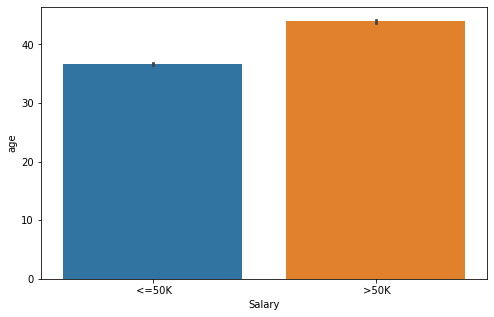

In [9]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['age'] , x = df_train['Salary'])

In [10]:
df[df['Salary']==0]['age'].mean() , df[df['Salary']==1]['age'].mean()

(36.608263806118394, 43.95911028236548)

#### + Average age of people having salary <= 50k is 37 <br> + Average age of people having salary > 50k is 44

## Workclass vs Salary

In [11]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

Text(0.5, 1.0, 'No. of people from different workclass having salary > 50k')

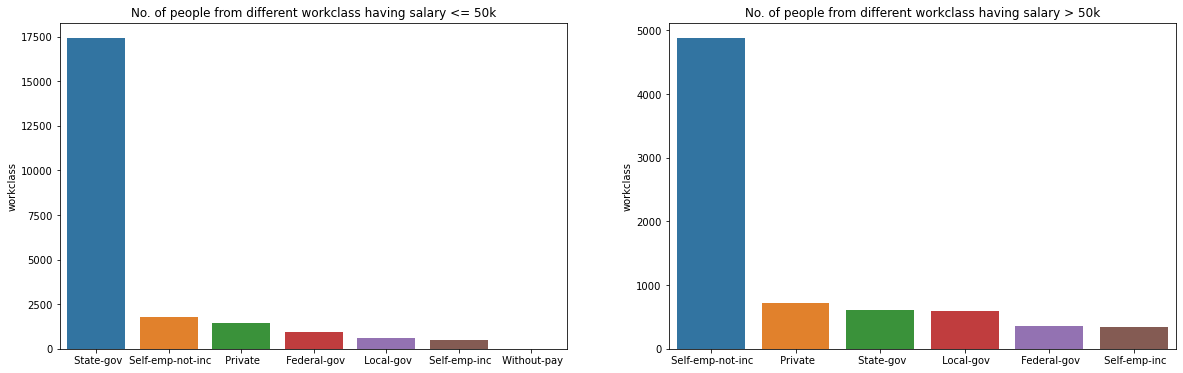

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.barplot(y=df[df['Salary']==0]['workclass'].value_counts() , x= df[df['Salary']==0]['workclass'].unique(),ax=ax1)
ax1.set_title('No. of people from different workclass having salary <= 50k')
sns.barplot(y=df[df['Salary']==1]['workclass'].value_counts() , x= df[df['Salary']==1]['workclass'].unique(),ax=ax2)
ax2.set_title('No. of people from different workclass having salary > 50k')

#### Most of the people working in the State-gov have salaries <= 50k <br> Most of the people who are self emplyed have salaries > 50k

## Race vs Salary

Text(0.5, 1.0, 'No. of people from different race having salary > 50k')

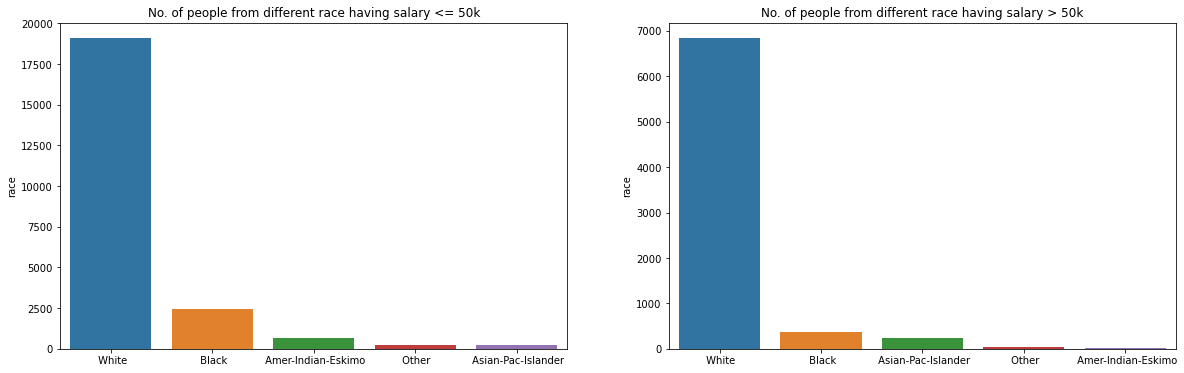

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.barplot(y=df[df['Salary']==0]['race'].value_counts() , x= df[df['Salary']==0]['race'].unique(),ax=ax1)
ax1.set_title('No. of people from different race having salary <= 50k')
sns.barplot(y=df[df['Salary']==1]['race'].value_counts() , x= df[df['Salary']==1]['race'].unique(),ax=ax2)
ax2.set_title('No. of people from different race having salary > 50k')

#### It can be observed that the dataset is biased towards white people

## Sex vs Salary

Text(0.5, 1.0, 'No. of people from different sex having salary > 50k')

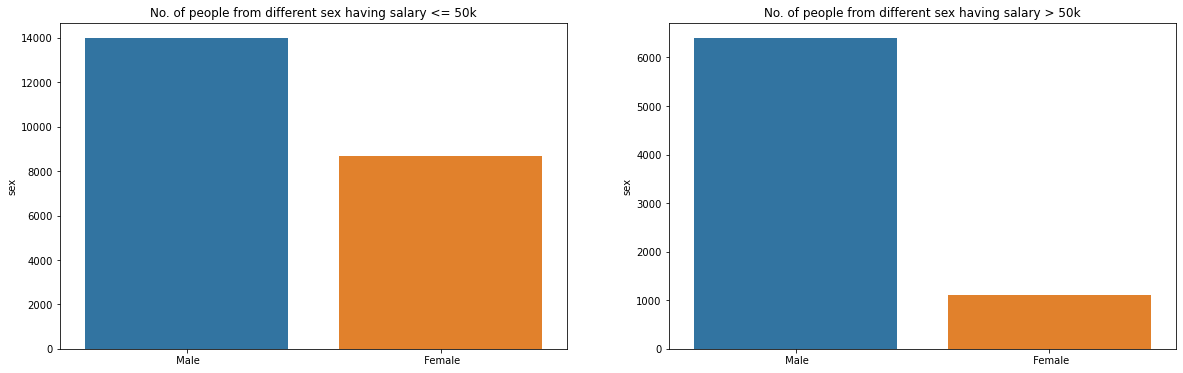

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.barplot(y=df[df['Salary']==0]['sex'].value_counts() , x= df[df['Salary']==0]['sex'].unique(),ax=ax1)
ax1.set_title('No. of people from different sex having salary <= 50k')
sns.barplot(y=df[df['Salary']==1]['sex'].value_counts() , x= df[df['Salary']==1]['sex'].unique(),ax=ax2)
ax2.set_title('No. of people from different sex having salary > 50k')

#### Most people having less and greater than 50k salaries are males. <br> This could be due to 2 reasons <br>1. The data is biased towards males.<br>2. Less working women than men in population.

## Null values

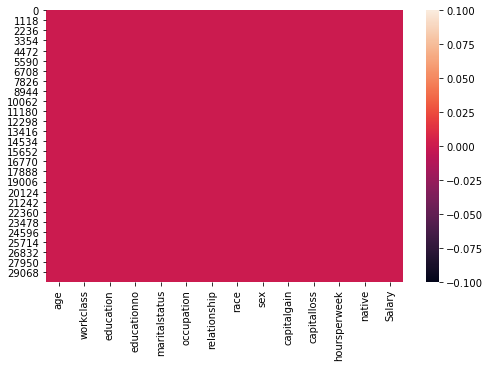

In [15]:
plt.figure(figsize =(8,5))
sns.heatmap(df.isnull())

#### It implies zero null values

## Correlation plot

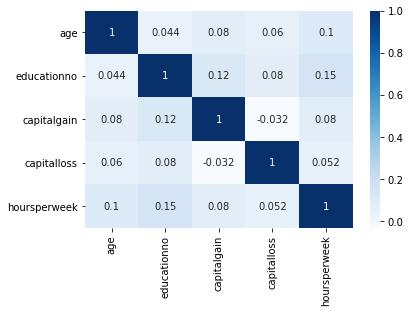

In [16]:
sns.heatmap(df_train.corr(), cmap = 'Blues', annot = True)

## Checking class imbalance

0    0.751069
1    0.248931
Name: Salary, dtype: float64


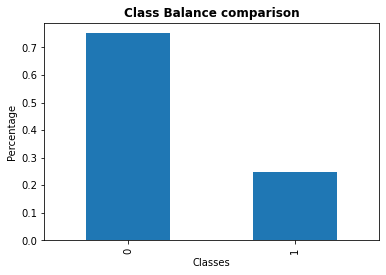

In [17]:
# Check target classes balancec
cla_bal = df['Salary'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Class Balance comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

#### 75% data has Salary <=50k. The data is imbalanced

# Pre-Processing

## Label encoding

In [18]:
df_train = pd.get_dummies(df_train,drop_first=True)
df_test = pd.get_dummies(df_test,drop_first=True)

In [19]:
df_train.shape , df_test.shape

((30161, 95), (15060, 95))

## Scaling

In [20]:
scaler = RobustScaler()
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Handling imbalances

In [21]:
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train_scaled, y_train.ravel())

1    0.5
0    0.5
Name: Target, dtype: float64


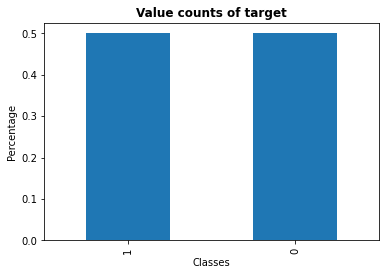

In [22]:
# Check target classes balance
df2 = pd.DataFrame(y_train , columns= ['Target'])
cla_bal = df2['Target'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Value counts of target',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

## PCA

In [23]:
def toPCA(X_train , X_test,ispca = False):
    if ispca:
        pca = PCA(n_components = 30)
        X_train = pca.fit_transform(X_train)
        X_test = pca.fit_transform(X_test)
    return X_train,X_test

# Modelling

In [24]:
# Creating a dataframe to keep record of auc scores
model = []
accuracy = []
roc_auc = []
def performance(new_model , new_roc_auc , new_accuracy):
    model.append(new_model)
    roc_auc.append(new_roc_auc)
    accuracy.append(new_accuracy)
    score_df = pd.DataFrame(zip(model , roc_auc,accuracy) , columns = ['Model', 'ROC_AUC','Accuracy Score'], index = None)
    #print(score_df)
    return score_df

In [25]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , roc_auc_score

In [26]:
# Creating model
clf_svm = SVC(C=0.1 , gamma= 0.1 , kernel= 'rbf')
clf_svm.fit(X_train , y_train)
y_train_pred = clf_svm.predict(X_train)
y_test_pred = clf_svm.predict(X_test)

# Calculating accuracy for training data
train_accuracy_svm = accuracy_score(y_train , y_train_pred)

# Calculating Roc_auc for training data
train_roc_auc_svm = roc_auc_score(y_train , y_train_pred)
performance('Training Data without PCA',train_roc_auc_svm,train_accuracy_svm)

# Calculating accuracy for testing data
test_accuracy_svm = accuracy_score(y_test , y_test_pred)

# Calculating roc_auc for testing data
test_roc_auc_svm = roc_auc_score(y_test , y_test_pred)
performance('Testing Data without PCA',test_roc_auc_svm,test_accuracy_svm)

,Model,ROC_AUC,Accuracy Score
0,Training Data without PCA,0.850704,0.850704
1,Testing Data without PCA,0.500000,0.754316


In [27]:

# PCA dimensionality reduction
X_train_pca , X_test_pca = toPCA(X_train , X_test , ispca = True)
clf_svm.fit(X_train_pca , y_train)
y_train_pred = clf_svm.predict(X_train_pca)
y_test_pred = clf_svm.predict(X_test_pca)

# Calculating accuracy for training data
train_accuracy_svm = accuracy_score(y_train , y_train_pred)

# Calculating roc_auc for training data
train_roc_auc_svm = roc_auc_score(y_train , y_train_pred)
performance('Training Data with PCA',train_roc_auc_svm,train_accuracy_svm)

# Calculating accuracy for testing data
test_accuracy_svm = accuracy_score(y_test , y_test_pred)

# Calculating roc_auc for testing data
test_roc_auc_svm = roc_auc_score(y_test , y_test_pred)
performance('Testing Data with PCA',test_roc_auc_svm,test_accuracy_svm)

,Model,ROC_AUC,Accuracy Score
0,Training Data without PCA,0.850704,0.850704
1,Testing Data without PCA,0.500000,0.754316
2,Training Data with PCA,0.848122,0.848122
3,Testing Data with PCA,0.500000,0.754316


#### It can be observed that there is no difference on accuracy score if we use PCA<br> No overfitting can be observed <br>Better performance can be achieved using hyperparameter tuning